# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan Jaya Jaya Institut

- Nama: Najmah Femalea
- Email: najmahfemalea15@gmail.com
- Id Dicoding: najmah_femalea

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample, shuffle
from sklearn.pipeline import Pipeline
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# import dataset
df = pd.read_csv("data.csv", sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# mengecek missing value
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Dari output diatas, tidak terdapat missing value pada data.

In [4]:
# melihat type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Jika dilihat dari data diatas:
-  nilai dari kolom **Curricular_units_1st_sem_grade** dan kolom **Curricular_units_2nd_sem_grade** memiliki type data float yang dimana kita akan membulatkannya menjadi 2 angka dibelakang koma saja.
- Terdapat ambigu/typo pada nama kolom **nacionality** yang seharusnya nationality, kita harus ganti nama kolom tersebut

In [5]:
# membulatkan nilai dari kolom curricular_units_1st_sem_grade dan curricular_units_2nd_sem_grade
rounded_columns = ['Curricular_units_1st_sem_grade',
                   'Curricular_units_2nd_sem_grade']
df.loc[:, rounded_columns] = df[['Curricular_units_1st_sem_grade',
                                 'Curricular_units_2nd_sem_grade']].round(2)

# ganti nama kolom dari nacionality
df.rename(columns={"Nacionality": "Nationality"}, inplace=True)

# lihat kembali datanya
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


Karena semua datanya sudah berbentuk numerik, kita ubah terlebih dahulu ke tipe data **category**. Dengan dtype='category' kita memberi tahu bahwa angka-angka itu bukan nilai kuantitatif yang “bisa dijumlah” atau “dihitung rata-rata,” melainkan label diskrit.

In [6]:
# sesuaikan tipe data
categorical_column = ["Marital_status", "Application_mode", "Course", "Daytime_evening_attendance", "Previous_qualification", "Nationality", "Mothers_qualification", "Fathers_qualification",
                      "Mothers_occupation", "Fathers_occupation", "Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International", "Status"]

ordinal_column = ["Application_order"]

numeric_column = ["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment", "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade",
                  "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_grade", "Curricular_units_2nd_sem_without_evaluations", "Unemployment_rate", "Inflation_rate",	"GDP"]

In [7]:
# mengubah tipe data menjadi category
df[categorical_column + ordinal_column] = df[categorical_column + ordinal_column].astype('category')

In [8]:
# melihat apakah sudah terganti
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nationality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

In [9]:
# melihat rangkuman parameter statistik
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.000000,4424.0,4424.0,4424.0,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6.0,18.0,8.0,17.0,2.0,17.0,NaN,21.0,29.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,1.0,1.0,1.0,9500.0,1.0,1.0,NaN,1.0,1.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919.0,1708.0,3026.0,766.0,3941.0,3717.0,NaN,4314.0,1069.0,1209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,0.541817,6.232143,8.063291,4.435805,10.230201,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,1.918546,2.195951,3.947951,3.014764,5.210819,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,0.000000,7.000000,10.000000,6.000000,13.330000,0.000000,13.900000,2.600000,1.790000,NaN


## Data Preparation / Preprocessing

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


C:\Users\najmah femalea\AppData\Local\Temp\ipykernel_24468\1447086769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='pastel')


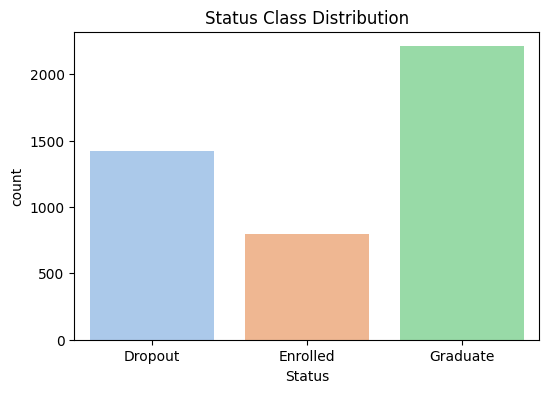

In [10]:
# melihat distribusi dari data attrition
print(df['Status'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df, palette='pastel')
plt.title('Status Class Distribution')
plt.show()

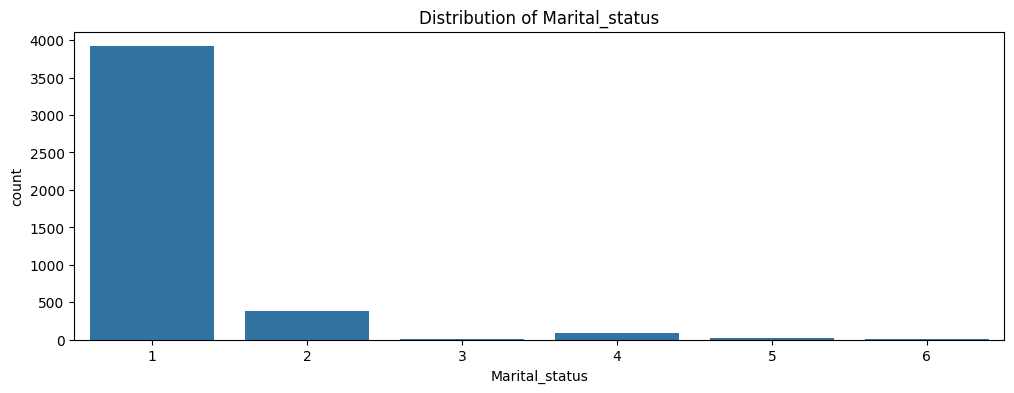

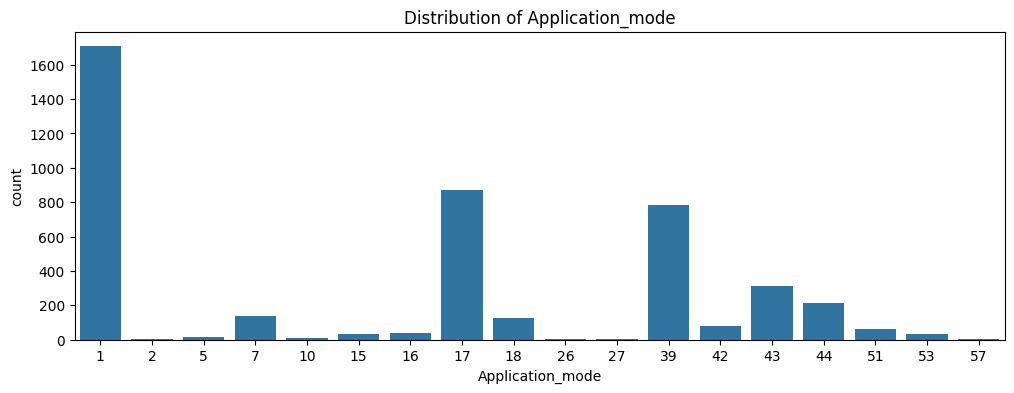

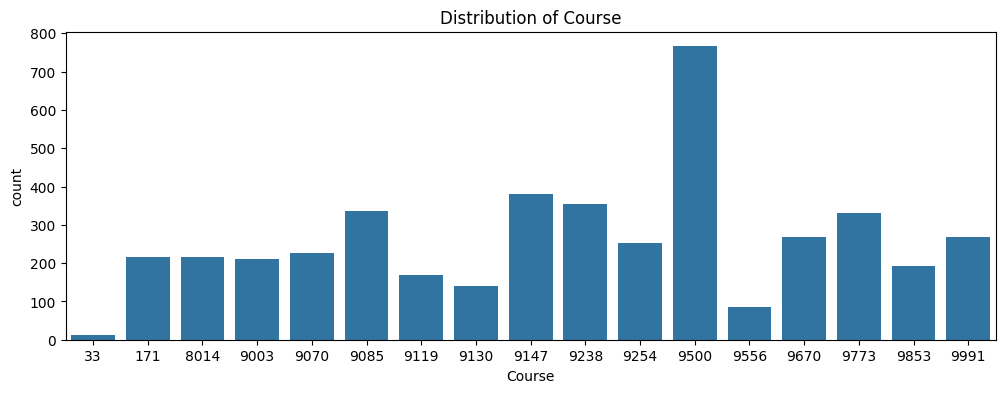

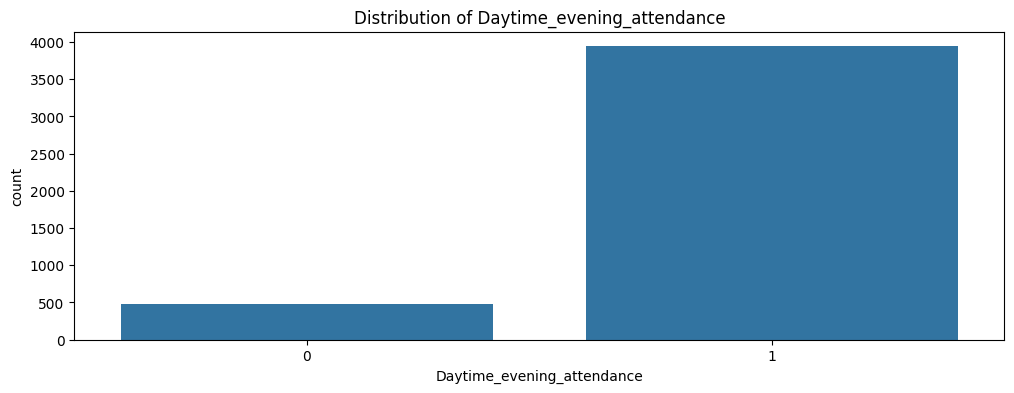

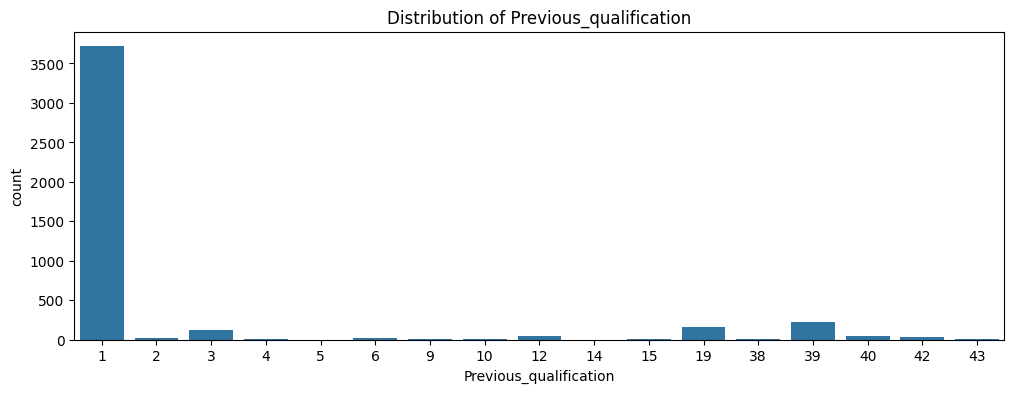

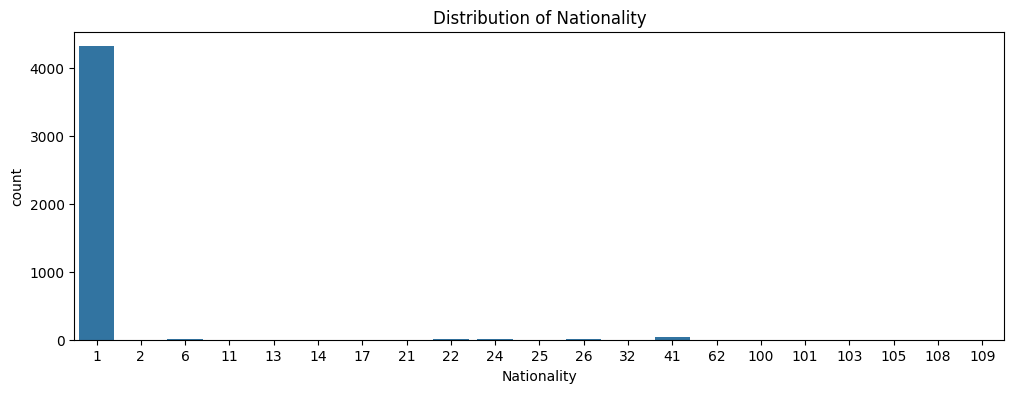

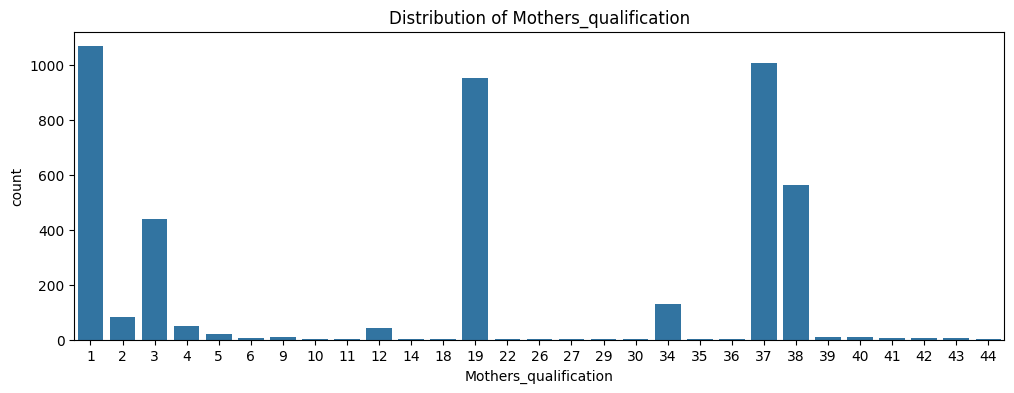

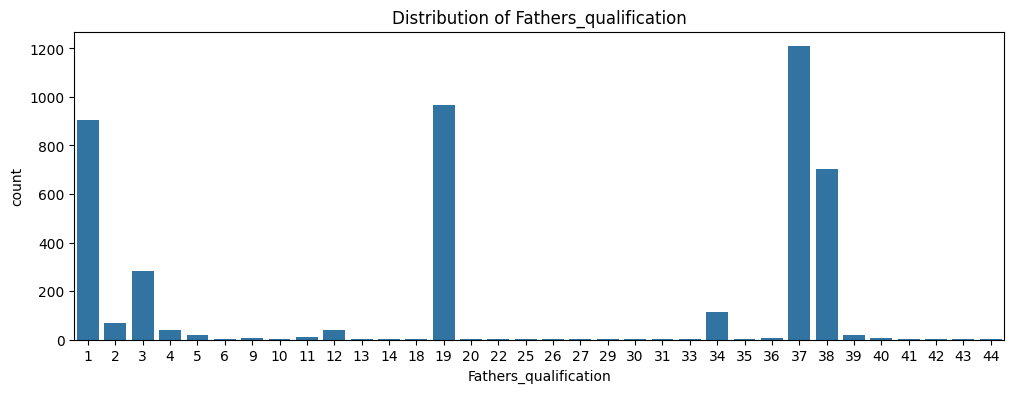

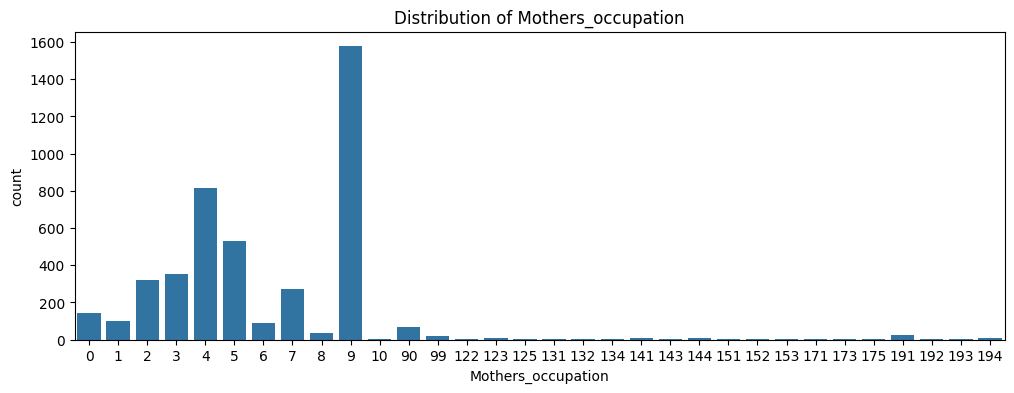

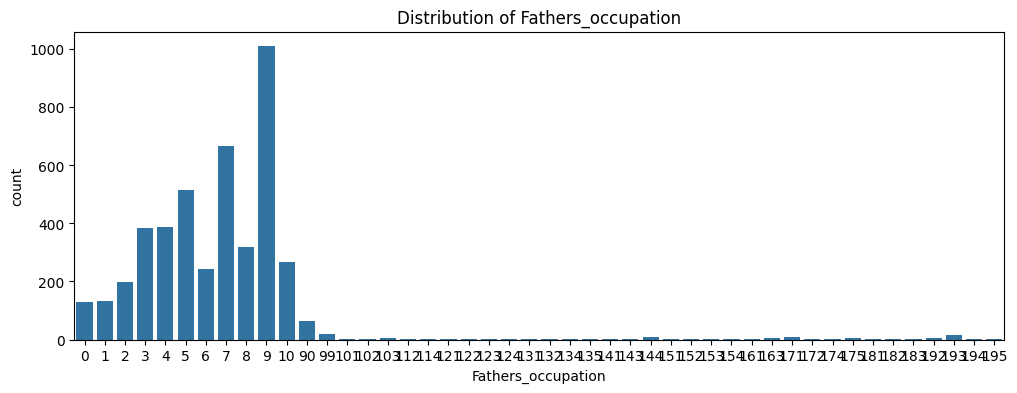

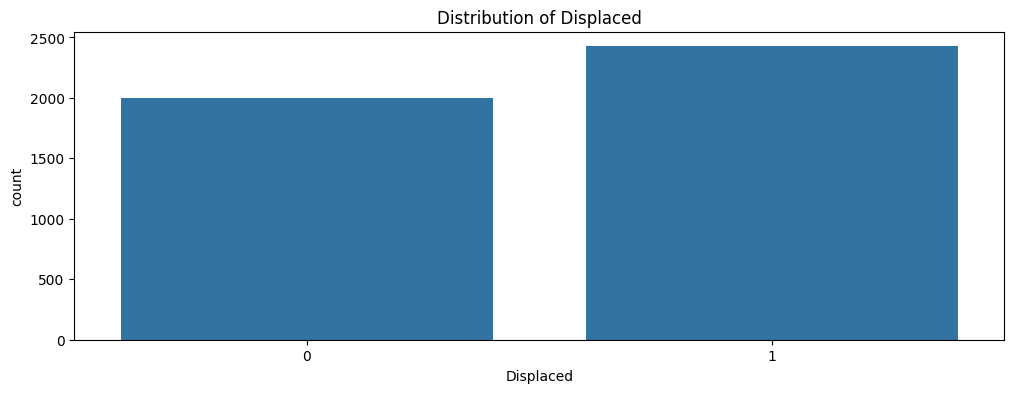

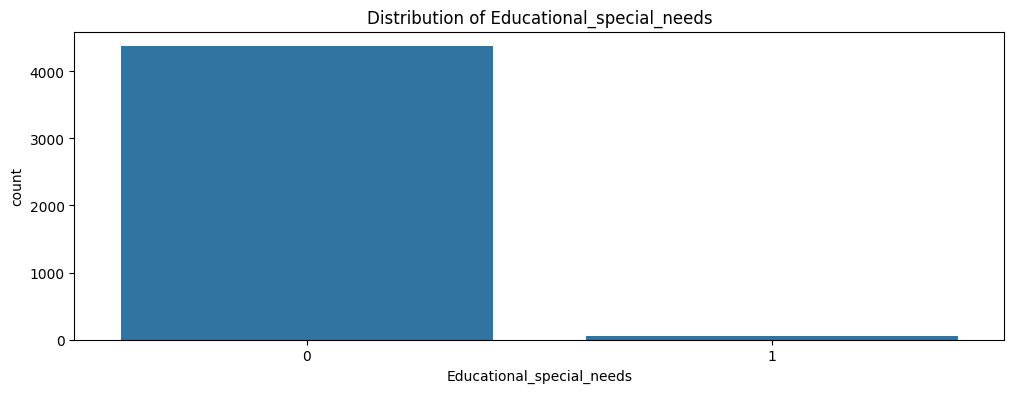

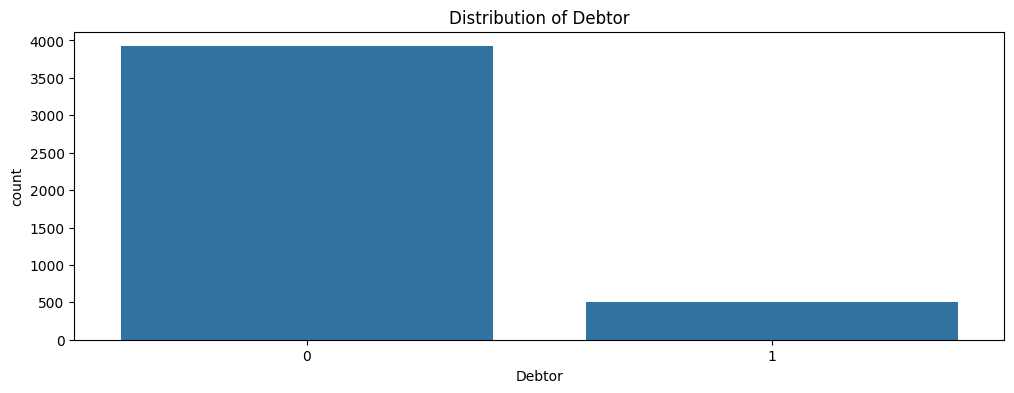

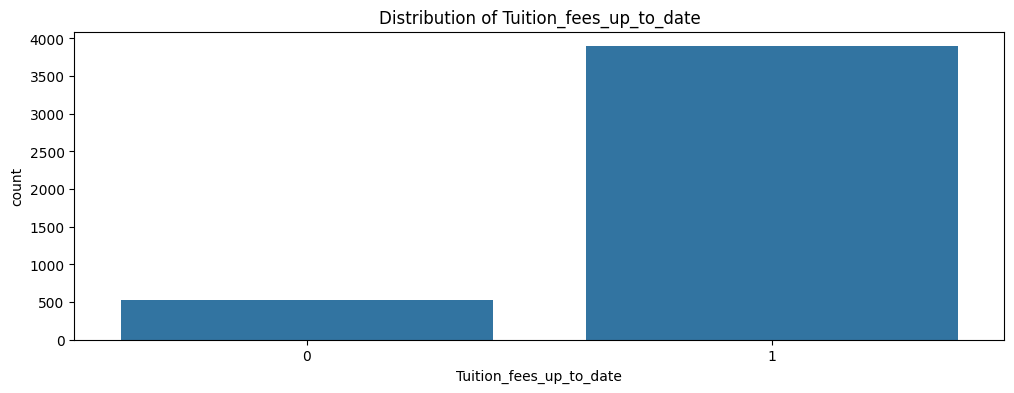

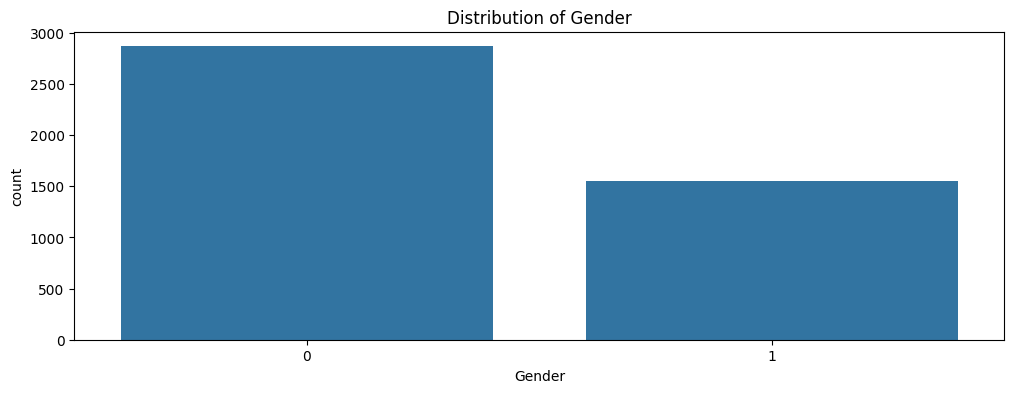

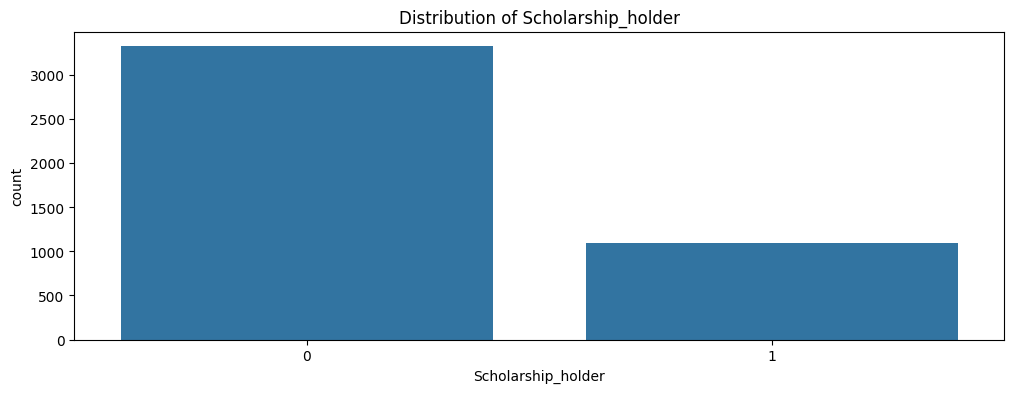

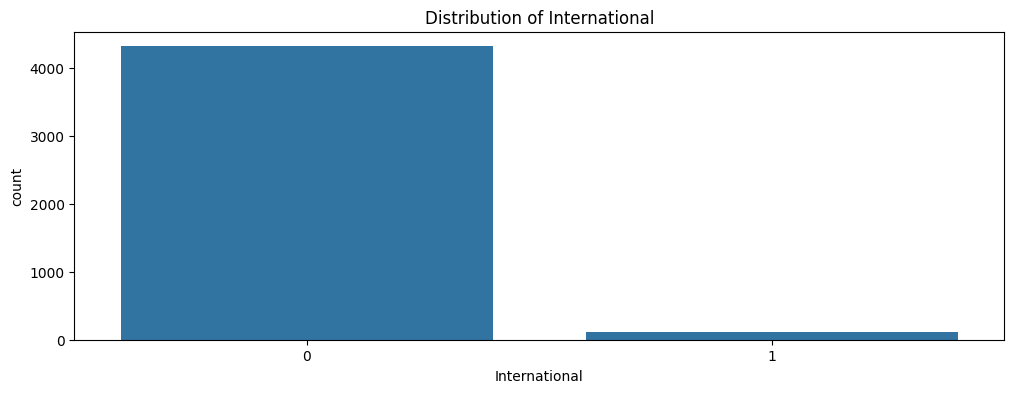

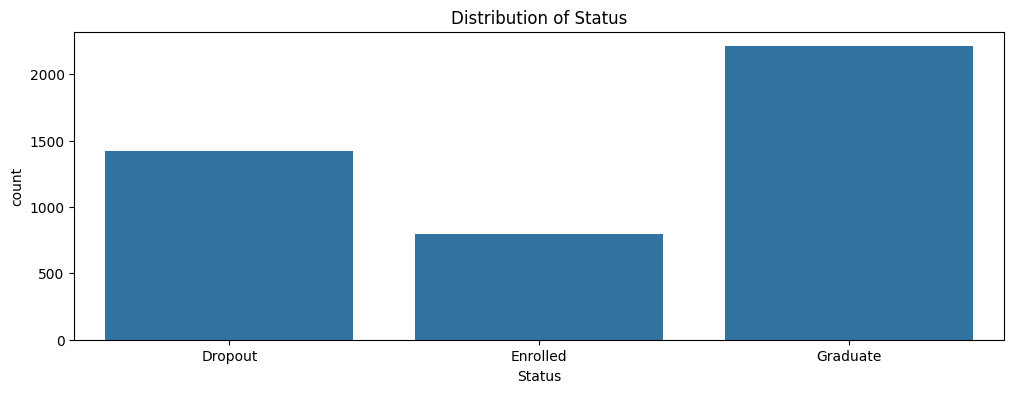

In [11]:
# melihat distribusi feature category

for col in categorical_column:
  plt.figure(figsize=(12,4))
  sns.countplot(data=df, x=col)
  plt.title(f"Distribution of {col}")
  plt.show()

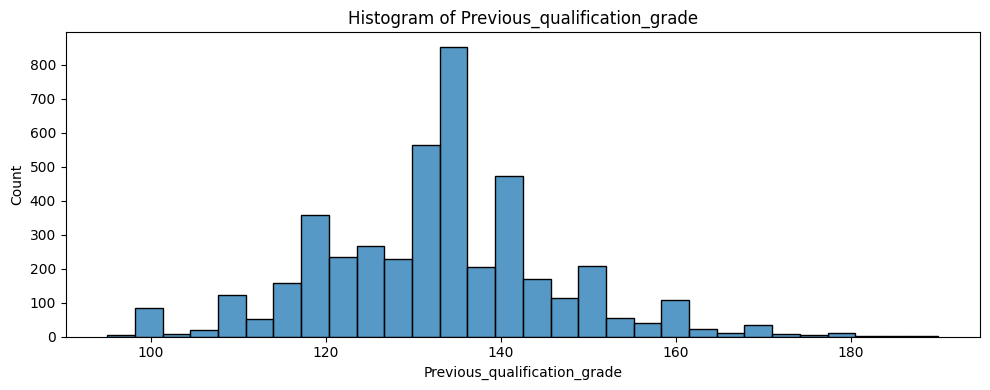

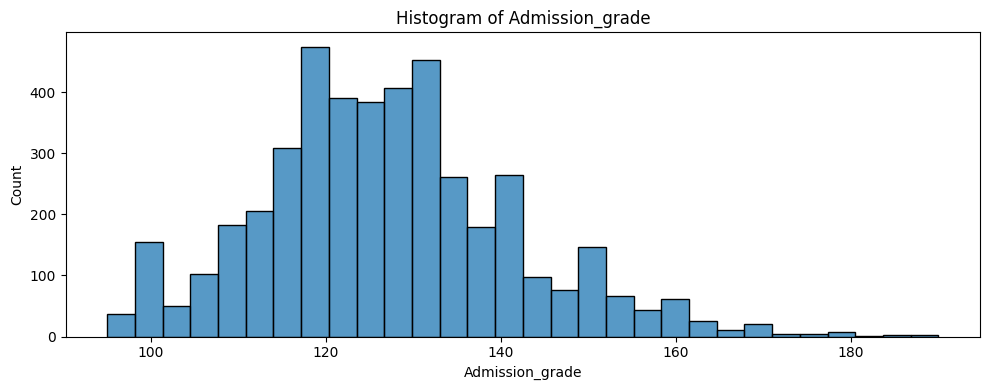

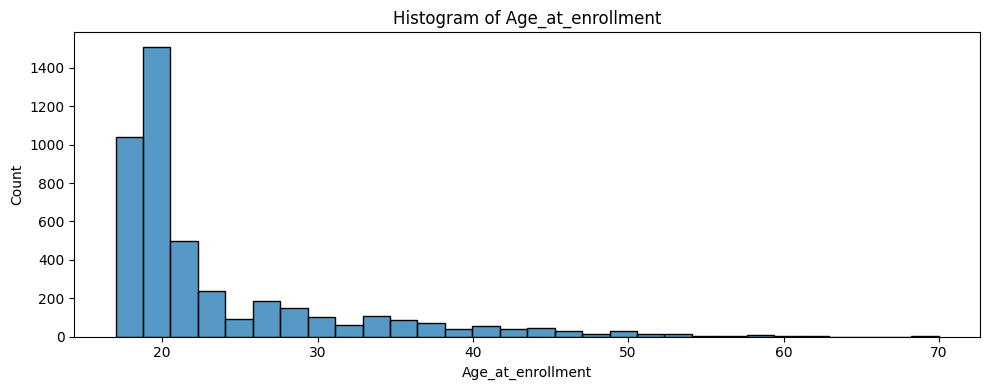

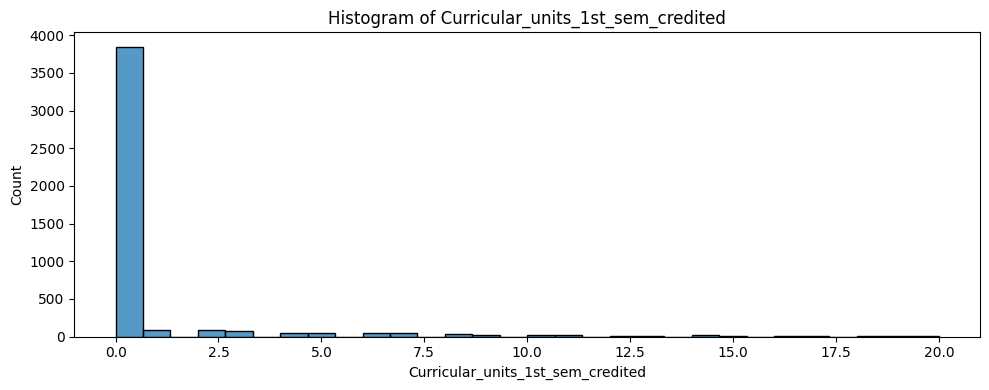

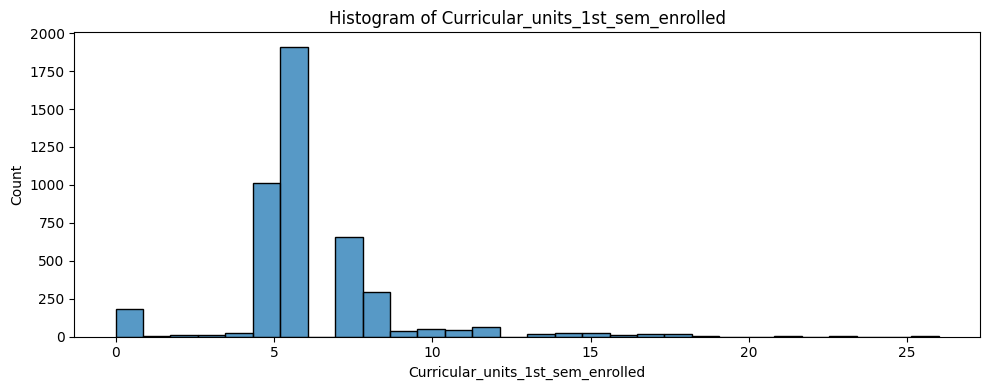

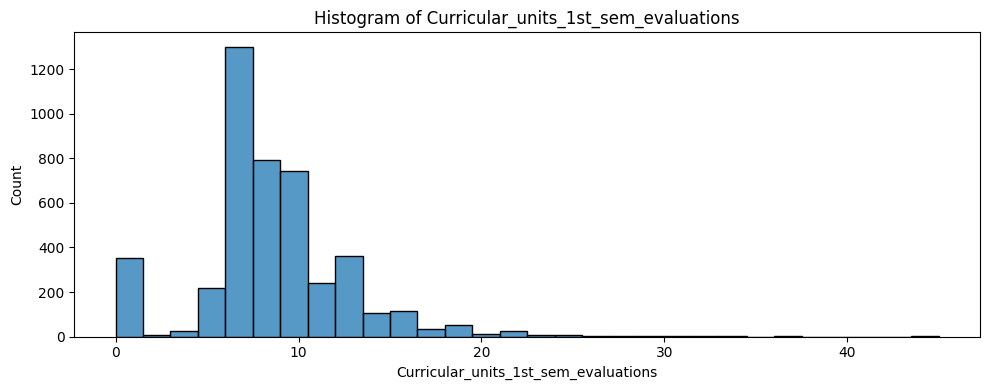

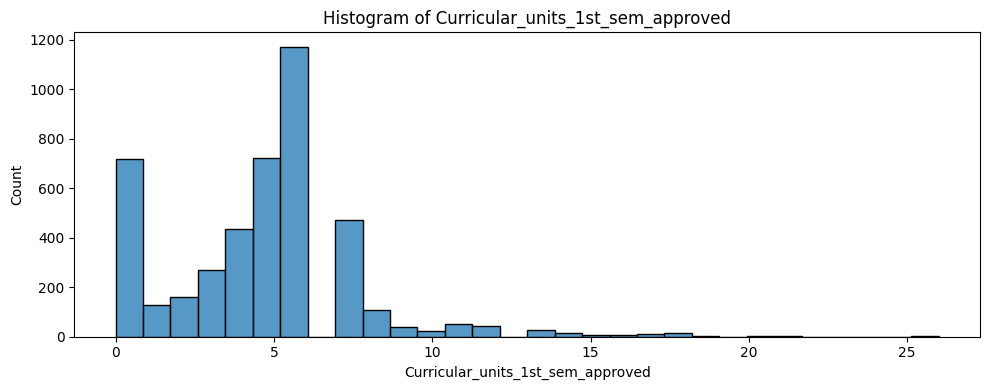

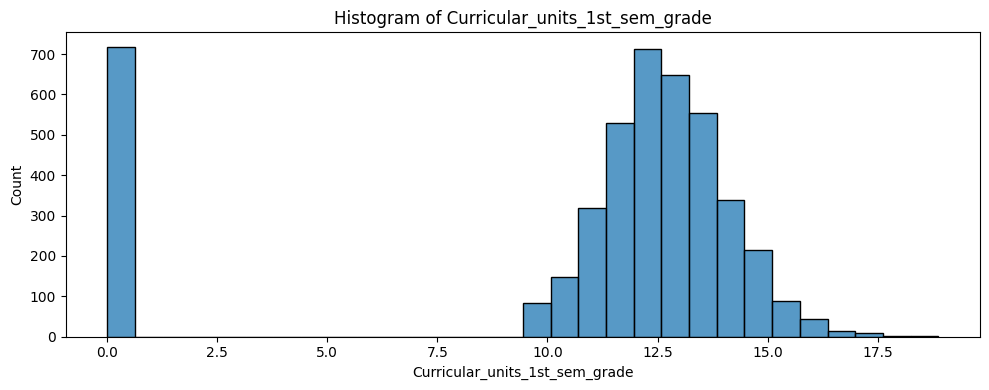

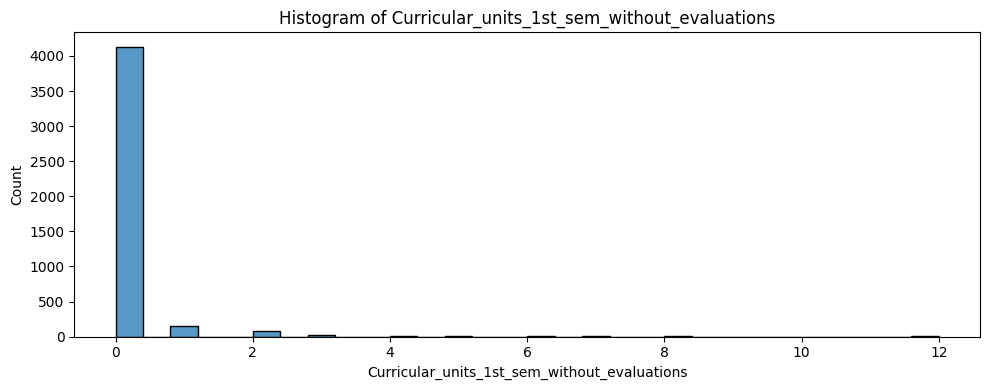

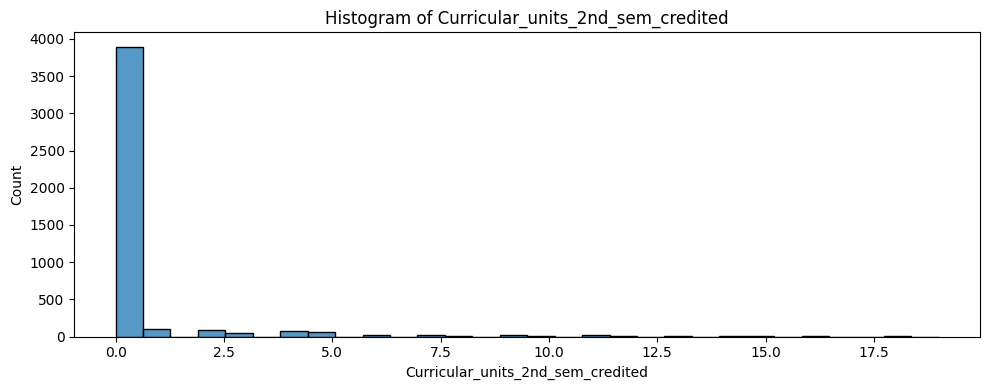

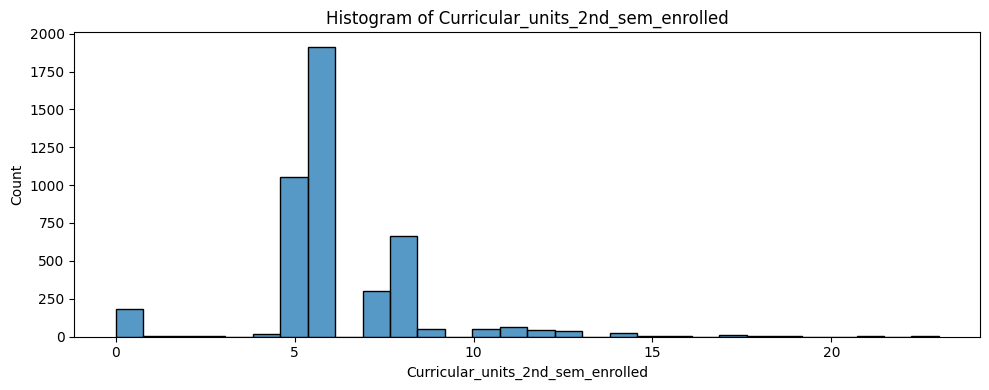

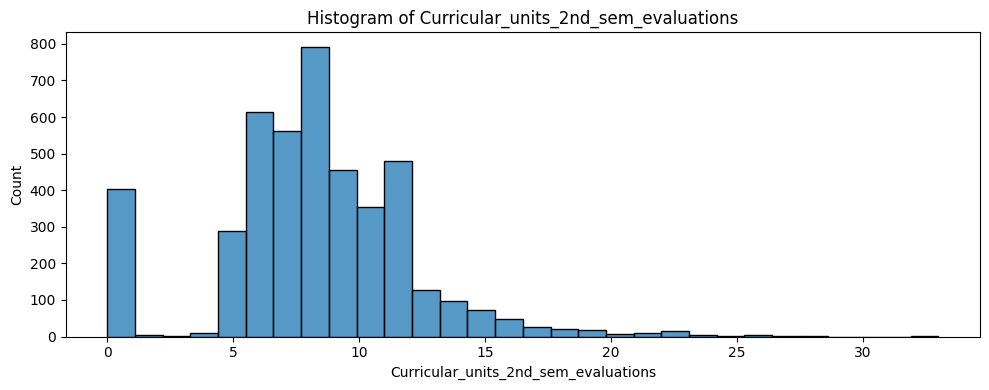

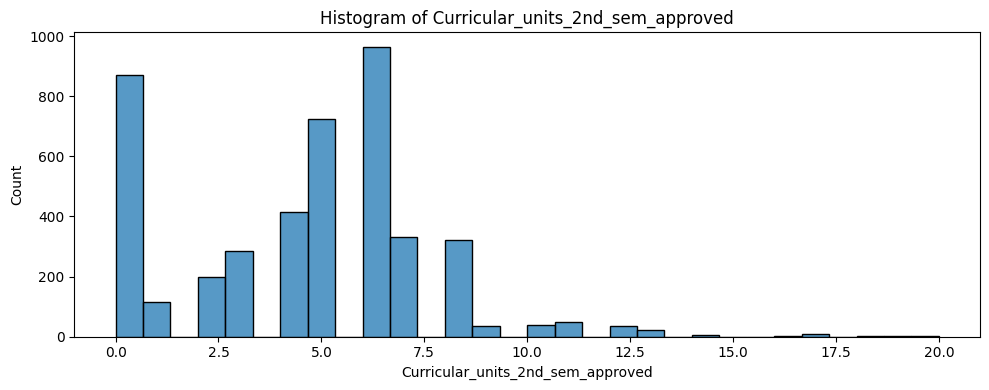

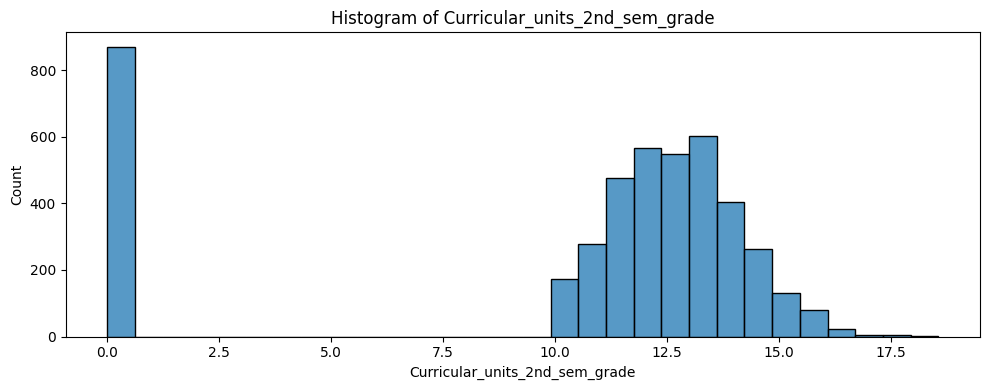

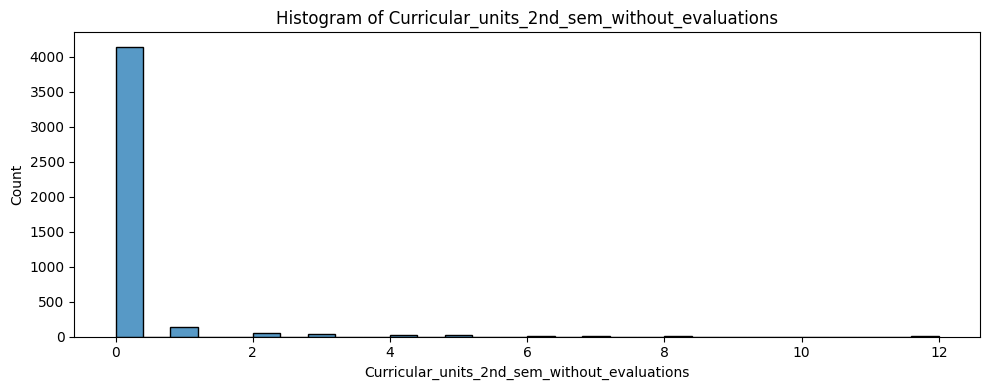

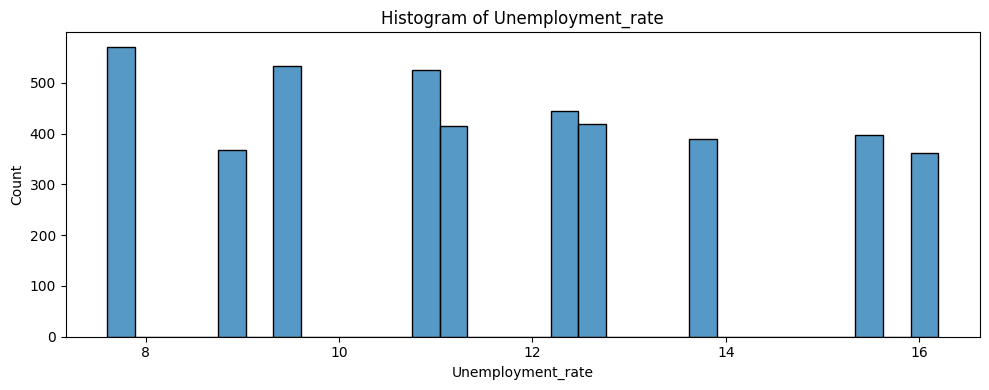

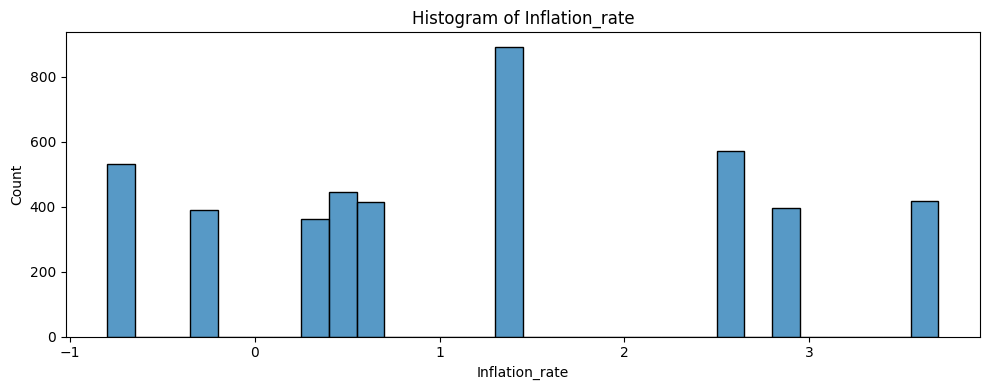

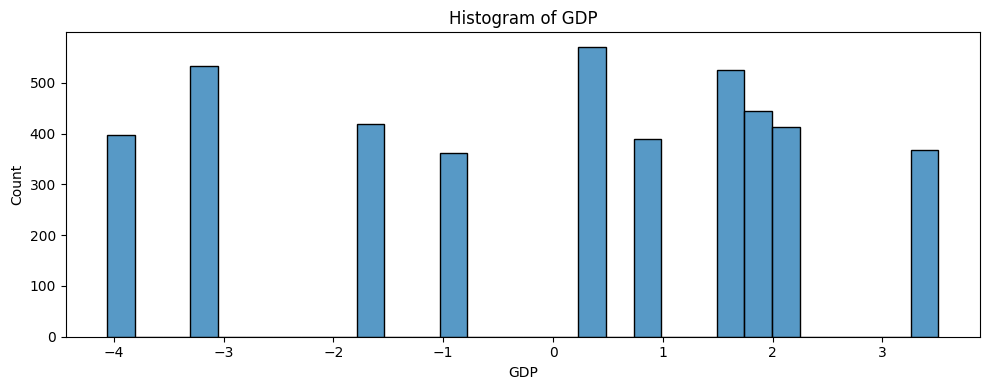

In [12]:
# melihat distribusi feature numeric
for col in numeric_column:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

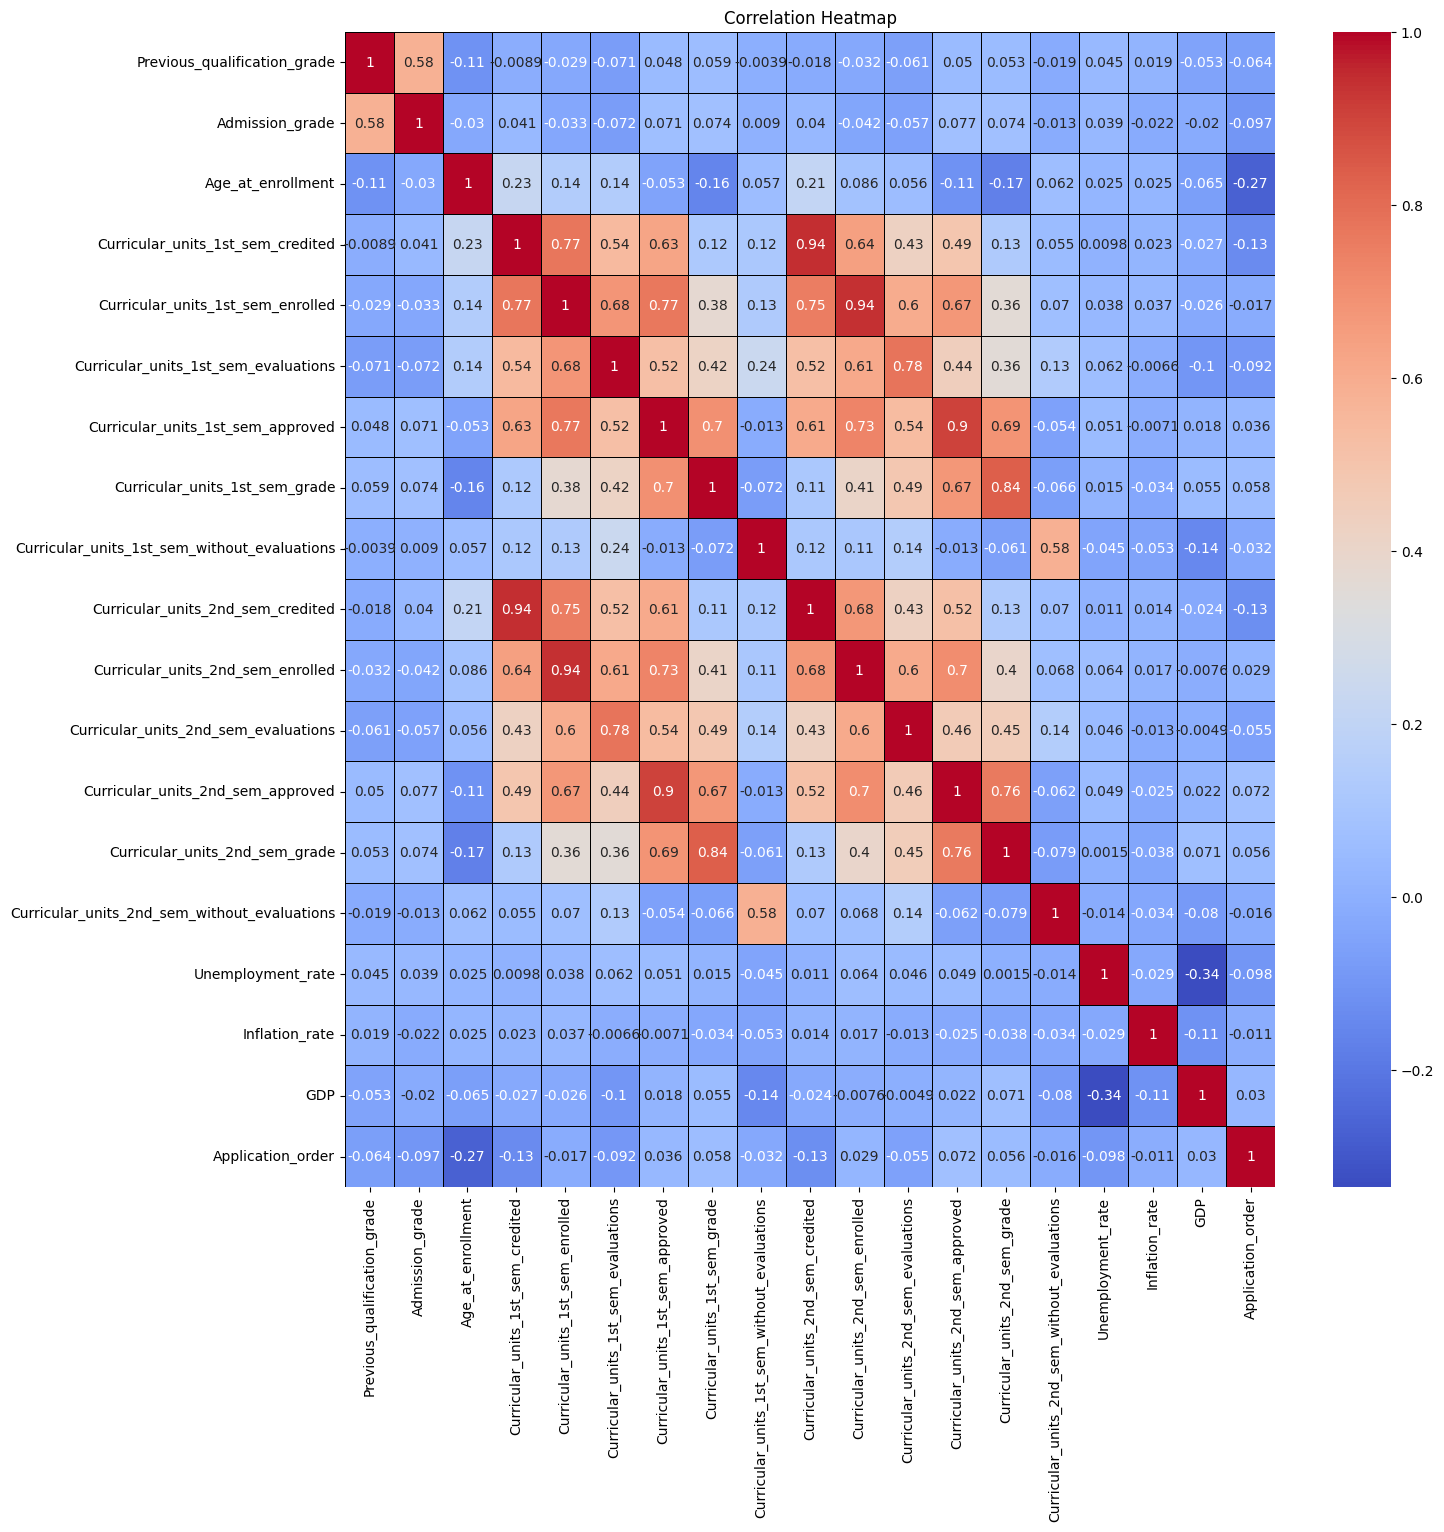

In [13]:
# melihat korelasi dari feature numeric
plt.figure(figsize=(15, 15))
sns.heatmap(df[numeric_column + ordinal_column].corr(), annot=True, cmap='coolwarm', linecolor="black", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

Berdasarkan heatmap diatas, terdapat beberapa kolom yang memiliki multikolinearitas. Untuk menghilangkan redundancy, mengurangi multikolinearitas, dan membuat model lebih stabil serta interpretasi koefisien menjadi bermakna. Dan memilih kolom yang tidak berkorelasi tinggi.

In [14]:
final_features = [
    "Previous_qualification_grade",
    "Admission_grade",
    "Age_at_enrollment",
    "Curricular_units_1st_sem_approved",
    "Application_order",
    "Application_mode",
    "Debtor",
    "Scholarship_holder",
    "Tuition_fees_up_to_date",
    "Daytime_evening_attendance",
    "Gender",
    "Displaced"
]

### Train Test - Split

In [15]:
# Cek jumlah data
print(f"Total rows in df: {len(df)}")

Total rows in df: 4424


In [16]:
# gabungkan kolom final features dan juga status
target = "Status"
df = df[final_features + [target]].copy()

In [17]:
# download data bersihnya
df.to_csv("cleaned_data.csv", index=False)

In [18]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
print(train_df.shape)
print(test_df.shape)

(3539, 13)
(885, 13)


### Oversampling

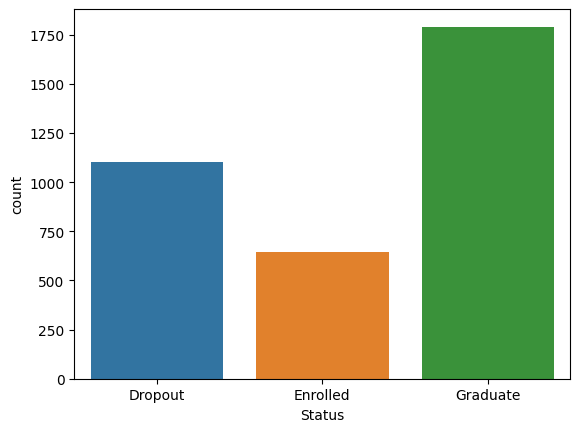

In [19]:
# melihat distribusi dari target "Status"
sns.countplot(data=train_df, x="Status", hue="Status")
plt.show()

Karena imbalance data, kita akan melakukan teknik oversampling untuk menangani imbalanced data yang terdapat dalam data latih.

In [20]:
train_df['Status'].value_counts()

Status
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64

In [21]:
# mengelompokkan data yang mengandung majoritas dan minoritas
df_minority_1 = train_df[(train_df.Status == "Dropout")]
df_minority_2 = train_df[(train_df.Status == "Enrolled")]
df_majority = train_df[(train_df.Status == "Graduate")]

In [22]:
# proses sampling
df_minority_1_oversampled = resample(df_minority_1, replace=True, n_samples=1791, random_state=42)
df_minority_2_oversampled = resample(df_minority_2, replace=True, n_samples=1791, random_state=42)
print(df_minority_1_oversampled.shape)
print(df_minority_2_oversampled.shape)

(1791, 13)
(1791, 13)


In [23]:
# menggabungkan kembali seluruh data tersebut dan diacak
oversampled_train_df = pd.concat([df_majority, df_minority_1_oversampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_2_oversampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
oversampled_train_df.sample(5)

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_approved,Application_order,Application_mode,Debtor,Scholarship_holder,Tuition_fees_up_to_date,Daytime_evening_attendance,Gender,Displaced,Status
4341,120.0,113.4,19,6,1,17,0,1,1,1,1,1,Graduate
2568,125.0,118.4,19,6,6,1,0,1,1,1,0,1,Graduate
4732,150.0,140.0,26,5,1,39,0,0,1,1,0,0,Enrolled
2700,135.0,128.0,19,6,1,1,0,1,1,1,0,1,Graduate
1924,120.0,124.2,18,5,1,17,0,0,1,1,1,1,Enrolled


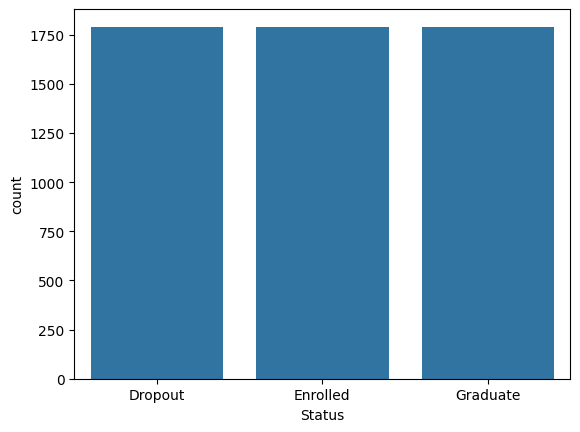

In [24]:
# cek balance dari data
sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

### Split X dan y

In [25]:
X_train = oversampled_train_df[final_features]
y_train = oversampled_train_df["Status"]

X_test = test_df[final_features]
y_test = test_df["Status"]

### Encoding dan Scaling

In [26]:
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler()

featuretransformer = ColumnTransformer(transformers=[
    ("num", scaler, [item for item in numeric_column if item in final_features]),
    ("cat", onehot_encoder, [item for item in categorical_column if item in final_features]),
    ("ord", ordinal_encoder, [item for item in ordinal_column if item in final_features])
])

X_train_processed = featuretransformer.fit_transform(X_train)
X_test_processed = featuretransformer.transform(X_test)

joblib.dump(featuretransformer, "model/featuretransformer.joblib")

feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "model/feature_columns.joblib")

['model/feature_columns.joblib']

In [27]:
def get_features_name(ct):
    output_features = []

    for name, transformer, columns in ct.transformers_:
        if name == "remainder":
            continue
        if hasattr(transformer, "get_feature_names_out"):
            feature_names = transformer.get_feature_names_out(columns)
        else:
            feature_names = columns
        output_features.extend(feature_names)
    return output_features

features_name = get_features_name(featuretransformer)

In [28]:
l_encoder = LabelEncoder()
y_train_encoded = l_encoder.fit_transform(y_train)
y_test_encoded = l_encoder.transform(y_test)

joblib.dump(l_encoder, "model/label_encoder.joblib")

['model/label_encoder.joblib']

## Modeling

beberapa algoritma yang akan digunakan.

- Decision tree
- Random forest
- Gradient Boosting

Selain beberapa algoritma machine learning di atas, kita juga akan menggunakan algoritma grid search untuk melakukan mencari parameter paling optimal dari suatu model.

## Decision Tree

In [29]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train_processed, y_train_encoded)

c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\users\najmah femalea\appdata\local\programs\python\python3

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [30]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [31]:
# gunakan hyperparameter yg diatas untuk membuat model
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=8,
    max_features='sqrt'
)

tree_model.fit(X_train_processed, y_train_encoded)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

## Random Forest

In [32]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train_processed, y_train_encoded)

c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\users\najmah femalea\appdata\local\programs\python\python

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [33]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [34]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=200,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(X_train_processed, y_train_encoded)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Gradient Boosting

In [35]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(X_train_processed, y_train_encoded)

c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\najmah femalea\appdata\local\programs\python\python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\users\najmah femalea\appdata\local\programs\python\python3

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [36]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [37]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    max_features='sqrt',
    n_estimators=200
)
gboost_model.fit(X_train_processed, y_train_encoded)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

In [38]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    # Ambil kembali label string dari encoder
    labels = l_encoder.classes_

    # Classification report
    print(classification_report(y_true, y_pred, target_names=labels))

    # Confusion matrix
    cnf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, index=labels, columns=labels)

    sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlGnBu', annot_kws={'size': 14})
    plt.ylabel('True Labels', fontsize=15)
    plt.xlabel('Predicted Labels', fontsize=15)
    plt.show()

    return confusion_matrix_df

## Gradient Boosting

              precision    recall  f1-score   support

     Dropout       0.81      0.64      0.71       316
    Enrolled       0.33      0.32      0.33       151
    Graduate       0.73      0.84      0.78       418

    accuracy                           0.68       885
   macro avg       0.62      0.60      0.61       885
weighted avg       0.69      0.68      0.68       885



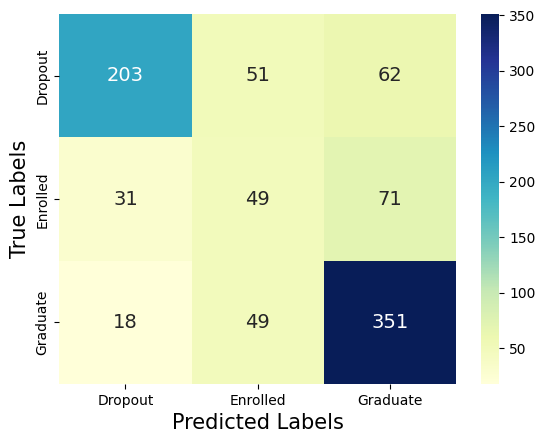

,Dropout,Enrolled,Graduate
Dropout,203,51,62
Enrolled,31,49,71
Graduate,18,49,351


In [39]:
# Prediksi menggunakan model
y_pred_test = gboost_model.predict(X_test_processed)

evaluating(y_pred=y_pred_test, y_true=y_test_encoded)

## Decision Tree

              precision    recall  f1-score   support

     Dropout       0.78      0.54      0.64       316
    Enrolled       0.25      0.53      0.34       151
    Graduate       0.73      0.61      0.66       418

    accuracy                           0.57       885
   macro avg       0.59      0.56      0.55       885
weighted avg       0.67      0.57      0.60       885



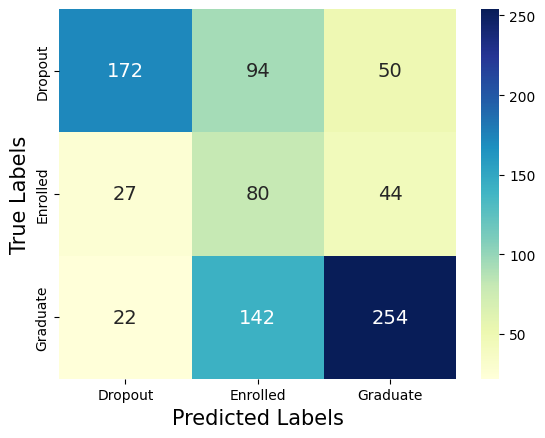

,Dropout,Enrolled,Graduate
Dropout,172,94,50
Enrolled,27,80,44
Graduate,22,142,254


In [40]:
y_pred_test = tree_model.predict(X_test_processed)
evaluating(y_pred=y_pred_test, y_true=y_test_encoded)

## Random Forest

              precision    recall  f1-score   support

     Dropout       0.82      0.64      0.72       316
    Enrolled       0.31      0.45      0.37       151
    Graduate       0.78      0.78      0.78       418

    accuracy                           0.67       885
   macro avg       0.63      0.62      0.62       885
weighted avg       0.71      0.67      0.69       885



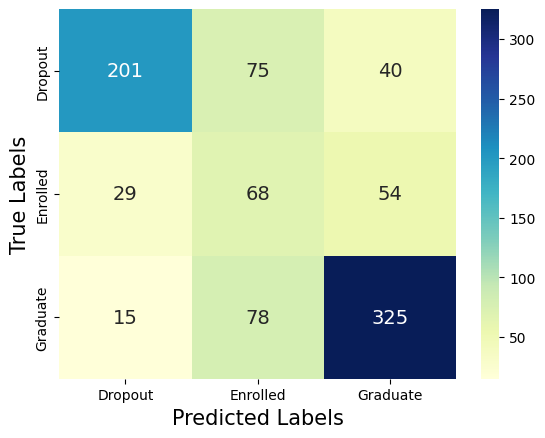

,Dropout,Enrolled,Graduate
Dropout,201,75,40
Enrolled,29,68,54
Graduate,15,78,325


In [41]:
y_pred_test = rdf_model.predict(X_test_processed)
evaluating(y_pred=y_pred_test, y_true=y_test_encoded)

In [42]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
